##### * Importing some useful libraries

In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad
from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

* **Did some surfing and found some websites offering malicious links.** And found some datasets

In [2]:
phish_data = pd.read_csv('phishing_site_urls.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'phishing_site_urls.csv'

#### * You can download dataset from my **Kaggle** Profile <a href='https://www.kaggle.com/taruntiwarihp/phishing-site-urls'>here</a>

In [4]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
phish_data.tail()

,URL,Label
549841,cam.ac.uk,good
549842,over-blog-kiwi.com,good
549843,merriam-webster.com,good
549844,bp3.blogger.com,good
549845,kinja.com,good


In [6]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549846 entries, 0 to 549845
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549846 non-null  object
 1   Label   549846 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


* **About dataset**
* Data is containg 5,49,346 unique entries.
* There are two columns.
* Label column is prediction col which has 2 categories 
    A. Good - which means the urls is not containing malicious stuff and **this site is not a Phishing Site.**
    B. Bad - which means the urls contains malicious stuffs and **this site isa Phishing Site.**
* There is no missing value in the dataset.

In [7]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

* **Since it is classification problems so let's see the classes are balanced or imbalances**

In [8]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

<AxesSubplot:ylabel='Label'>

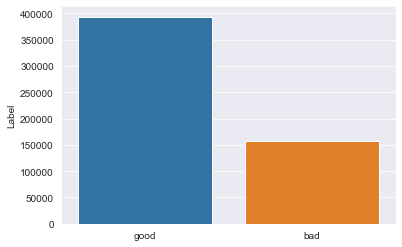

In [9]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

### Preprocessing

* **Now that we have the data, we have to vectorize our URLs. I used CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form.**

#### RegexpTokenizer
* A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [10]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [11]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [12]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [13]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.0261031999999943 sec


In [14]:
phish_data.sample(5)

,URL,Label,text_tokenized
344906,genealogybuff.com/mi/wayne/webbbs_config.pl/re...,good,"[genealogybuff, com, mi, wayne, webbbs, config..."
435269,spoke.com/dir/p/bolduc/scott,good,"[spoke, com, dir, p, bolduc, scott]"
281275,answers.com/topic/umana-1,good,"[answers, com, topic, umana]"
465437,wolframalpha.com/input/?i={y%27%27%28t%29+%3D+...,good,"[wolframalpha, com, input, i, y, t, D, g, B, y..."
339366,flickr.com/photos/nypl/3110033771/,good,"[flickr, com, photos, nypl]"


#### SnowballStemmer
* Snowball is a small string processing language, gives root words

In [15]:
stemmer = SnowballStemmer("english") # choose a language

In [16]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 40.4162932 sec


In [17]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
166819,dubai.pro-stay.com/dubai_apartments/grand-midw...,good,"[dubai, pro, stay, com, dubai, apartments, gra...","[dubai, pro, stay, com, dubai, apart, grand, m..."
421719,remembertheafl.com/AFLMVPs.htm,good,"[remembertheafl, com, AFLMVPs, htm]","[remembertheafl, com, aflmvp, htm]"
245509,techcrunch.com/2011/05/09/google-partners-with...,good,"[techcrunch, com, google, partners, with, sony...","[techcrunch, com, googl, partner, with, soni, ..."
42869,passion-marseille.com//wp-content/uploads/2012...,bad,"[passion, marseille, com, wp, content, uploads...","[passion, marseill, com, wp, content, upload, ..."
110983,norcaind.com/includes/Anna_lv/mine/login.php?e...,bad,"[norcaind, com, includes, Anna, lv, mine, logi...","[norcaind, com, includ, anna, lv, mine, login,..."


In [18]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.1933215999999902 sec


In [19]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
452400,truth-out.org/julie-doucet-its-amazing-im-able...,good,"[truth, out, org, julie, doucet, its, amazing,...","[truth, out, org, juli, doucet, it, amaz, im, ...",truth out org juli doucet it amaz im abl make ...
499148,aqfmirtqlnuerw.org/php/upload.php,bad,"[aqfmirtqlnuerw, org, php, upload, php]","[aqfmirtqlnuerw, org, php, upload, php]",aqfmirtqlnuerw org php upload php
476944,youtube.com/watch?v=koRVWzs32TE,good,"[youtube, com, watch, v, koRVWzs, TE]","[youtub, com, watch, v, korvwz, te]",youtub com watch v korvwz te
113236,dmoodontologia.com.br/ohgod/mytee%20(1)/Freshw...,bad,"[dmoodontologia, com, br, ohgod, mytee, Freshw...","[dmoodontologia, com, br, ohgod, myte, freshwo...",dmoodontologia com br ohgod myte freshwork ood...
104099,alhajicarpentry.com/bigboy/file/files/db/file....,bad,"[alhajicarpentry, com, bigboy, file, files, db...","[alhajicarpentri, com, bigboy, file, file, db,...",alhajicarpentri com bigboy file file db file d...


### Visualization 
**1. Visualize some important keys using word cloud**

#### Scrape any website
* First, setting up the Chrome webdriver so we can scrape dynamic web pages.

#### Chrome webdriver
* WebDriver tool use for automated testing of webapps across many browsers. It provides capabilities for navigating to web pages, user input and more

In [20]:
browser = webdriver.Chrome(r"chromedriver.exe")

In [34]:
list_urls = ['win-install.com/microsoft-excel','win-install.com/microsoft-excel/download/ic/bing'] #here i take phishing sites 
links_with_text = []

* I took some phishing site to see were the hackers redirect(on different link) us.
* Use the BeautifulSoup library to extract only relevant hyperlinks for Google, i.e. links only with '<'a'>' tags with href attributes. 

#### BeautifulSoup
* It is use for getting data out of HTML, XML, and other markup languages. 

In [37]:
for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

WebDriverException: Message: chrome not reachable
  (Session info: chrome=99.0.4844.84)


#### Turn the URL’s into a Dataframe
* After you get the list of your websites with hyperlinks turn them into a Pandas DataFrame with columns “from” (URL where the link resides) and “to” (link destination URL)

In [23]:
df = pd.DataFrame(links_with_text, columns=["from", "to"])

In [24]:
df.head()

,from,to


#### Step 3: Draw a graph
* Finally, use the aforementioned DataFrame to **visualize an internal link structure by feeding it to the Networkx method from_pandas_edgelist first** and draw it by calling nx.draw

### Creating Model

#### CountVectorizer
* CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [26]:
#create cv object
cv = CountVectorizer()

In [27]:
#help(CountVectorizer())

In [28]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [29]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### * Spliting the data 

In [30]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

### LogisticRegression
* Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [31]:
# create lr object
lr = LogisticRegression()

In [32]:
lr.fit(trainX,trainY)

LogisticRegression()

In [33]:
lr.score(testX,testY)

0.9642664881931007

.*** Logistic Regression is giving 96% accuracy, Now we will store scores in dict to see which model perform best**

In [38]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9781562815240165
Testing Accuracy : 0.9642664881931007

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.93     36449
        Good       0.99      0.96      0.98    101013

    accuracy                           0.96    137462
   macro avg       0.95      0.96      0.96    137462
weighted avg       0.97      0.96      0.96    137462


CONFUSION MATRIX


<AxesSubplot:>

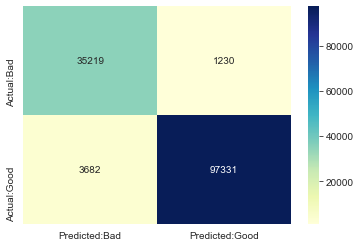

In [39]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

### MultinomialNB
* Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithms based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.

In [40]:
# create mnb object
mnb = MultinomialNB()

In [41]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [42]:
mnb.score(testX,testY)

0.9573773115479187

*** MultinomialNB gives us 95% accuracy**  

In [43]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9738229417242182
Testing Accuracy : 0.9573773115479187

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.93      0.92     38010
        Good       0.97      0.97      0.97     99452

    accuracy                           0.96    137462
   macro avg       0.94      0.95      0.95    137462
weighted avg       0.96      0.96      0.96    137462


CONFUSION MATRIX


<AxesSubplot:>

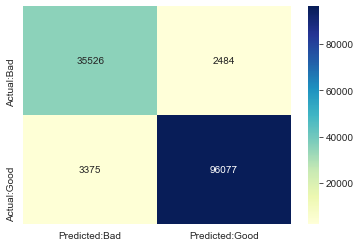

In [44]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<AxesSubplot:ylabel='Accuracy'>

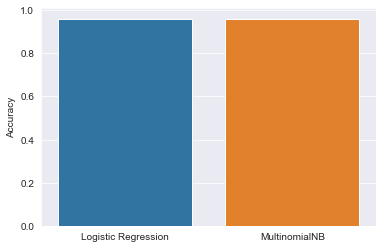

In [45]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

*** So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression**

In [46]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [47]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [48]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [49]:
pipeline_ls.score(testX,testY) 

0.9667835474531143

Training Accuracy : 0.9808600721657484
Testing Accuracy : 0.9667835474531143

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     37058
        Good       0.99      0.97      0.98    100404

    accuracy                           0.97    137462
   macro avg       0.95      0.97      0.96    137462
weighted avg       0.97      0.97      0.97    137462


CONFUSION MATRIX


<AxesSubplot:>

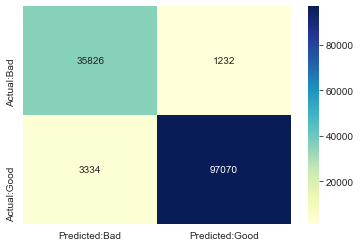

In [50]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [51]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [52]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9667835474531143


In [54]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']


https://research.aalto.fi/en/datasets/phishstorm-phishing-legitimate-url-dataset